# AB-тестирование
## Задание AB.7


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

---

**Баллы за задание:**

* Задача 1 — 40 баллов
* Задача 2 — 70 баллов
* Задача 3 — 60 баллов


In [1]:
import numpy as np
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
from collections.abc import Iterable
from scipy.optimize import curve_fit

from statsmodels.stats.proportion import proportion_confint
import statsmodels.formula.api as sm

import time
from IPython.display import clear_output

# параллельные вычисления
from joblib import Parallel, delayed

import warnings

warnings.filterwarnings("ignore")
# отключает FutureWarning и при параллельном вычислении
import os

os.environ["PYTHONWARNINGS"] = "ignore::FutureWarning"

sns.set(palette="Set2", style="whitegrid", font_scale=1.3)

In [2]:
# Bot check

# HW_ID: ds_ab7
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

И снова пррриветик! Перед тобой очередное захватывающее домашнее задание по АБ-тестированию, но на этот раз последнее, потому как следующие будут уже по Causal inference. Возьми чай или кофе, усаживайся поудобнее, настрой музыку в свой ритм, и поехали!

*Если какая-то задача кажется сложной, переходи к следующей. Каждая задача практически не зависит от других, может быть только 2-я немного от 1-й.*

---

### Задача 1.

Рассмотрим наблюдательный и cookie-cookie-day подходы. В предположении аддитивности эффектов покажи, что оценки эффекта привыкания $\widehat{\delta}_t$ являются несмещенными, а также посчитай их дисперсию.

При каком значении количества временных интервалов $T$ в эксперименте дисперсия в наблюдательном подходе становится гарантированно меньше дисперсии в cookie-cookie-day методе?

*А ведь это теоретическая задача, где даже ничего кодить не надо, представляешь? Посмотри только ноутбук с лекции, он поможет.*

**Прикрепил решение в PDF, если не забыл**

---
### Задача 2.

Теперь давай проведем валидацию по вероятности ошибки 1 рода и мощности критерия для проверки гипотезы об отсутствии эффекта привыкания в момент времени $t$, то есть $\mathsf{H}_0\colon \delta_t = 0$, для наблюдательного и cookie-cookie-day подходов при разных параметрах эффекта. 

*Помнишь, как называется процедура, которая позволяет сделать оценку требуемых величин? Почти в каждой теме мы ее видели.*

Прежде всего определимся, каким критерием будем проверять гипотезу. Можно пойти напрямую и свести к чему-то хорошо известному, а можно воспользоваться результатами первой задачи.

*Оба подхода очень простые, верим, ты справишься!*

Распиши, каким подходом будешь тестировать



По результатам предыдущей задачи мы знаем дисперсию наших оценок (по ним строим оценку дисперсии, как всегда, применяя теорему Слуцкого в переходе), еще они несмещенные, поэтому по ним просто строим ассимптотические критерии Вальда (двусторонние, конечно)

То есть по стандартной статистике

$$T(X, Y) = \frac{\hat \delta_t(X, Y)}{\hat \sigma_{\hat \delta_t}(X, Y)}$$

Сама процедура состоит в многократном применении следующего:

1) Сэмплируем $X_{i t j}, Y_{it}$ в случае cookie-cookie-day и $X_{i t}, Y_{it}$ в наблюдательном
2) Проверяем критерий

Далее оцениваем долю отвержений

Для оценки мощности сэмплируем с эффектом

Для исследования рассмотри, как минимум, три случая: 
- эффект привыкания есть;
- эффекта привыкания нет, как и прочих зависящих от времени эффектов, возникающих только в экспериментальной выборке;
- эффекта привыкания нет, но есть другой эффект, зависящий от времени, возникающий только в экспериментальной выборке, например, недельная сезонность (можно придумать что-то другое).

*Кажется, тут опять надо скопировать полотно разных функций, как-то их соединить и модифицировать. Например, генерация данных с эффектом была на последнем занятии.*

Константы

In [3]:
num_users = 15000  # количество пользователей
period = 14  # длительность эксперимента

avg_usage_distr = sps.expon(scale=2000)  # распределение на avg_daily_usage
shows_up_distr = sps.bernoulli(p=0.5)  # распределение на shows_up
daily_variation_distr = sps.norm(
    loc=1, scale=4
)  # распределение на daily_variation

Код функций

In [4]:
def generate_raw_data(
    num_users, period, avg_usage_distr, shows_up_distr, daily_variation_distr
):
    """
    Генерирует данные описанным выше способом

    - num_users - количество пользователей
    - period - длительность эксперимента
    - avg_usage_distr - распределения на avg_daily_usage
    - shows_up_distr - распределение на shows_up
    - daily_variation_distr - распределение на daily_variation

    Возвращает
        data - DataFrame длины num_users * period
    """

    data = pd.DataFrame(range(num_users), columns=["user_id"])
    data["avg_daily_usage"] = avg_usage_distr.rvs(size=num_users)

    data["day"] = [range(period) for _ in range(num_users)]
    data = data.explode("day")
    data["day"] = data["day"].astype(int)

    data["shows_up"] = shows_up_distr.rvs(size=num_users * period)
    data["daily_variation"] = daily_variation_distr.rvs(size=num_users * period)

    data["daily_usage"] = (
        data["avg_daily_usage"] * data["shows_up"] * data["daily_variation"]
    )
    data.loc[data["daily_usage"] <= 0, "daily_usage"] = 0

    return data

def get_exponential_model(mode):
    """
    Возвращает функцию для моделирования эффекта mode (novelty или primacy)
    """

    assert mode in ["novelty", "primacy"]

    def novelty_model(day, theta, gamma):
        return np.exp(-day * gamma) * theta

    def primacy_model(day, theta, gamma):
        return (1 - np.exp(-day * gamma)) * theta

    if mode == "novelty":
        return novelty_model
    else:
        return primacy_model


def split_groups(data, cnt_groups, target_column="group"):
    """
    Добавляет столбец target_column с номерами групп пользователей в data

    - data - DataFrame с данными
    - cnt_groups - количесто групп, на которые надо поделить пользователей
    - target_column - имя колонки с номером группы
    """

    users = data["user_id"].unique()
    np.random.shuffle(users)

    data[target_column] = 0

    for group in range(cnt_groups):
        group_idxs = data["user_id"].isin(users[group::cnt_groups])
        data.loc[group_idxs, target_column] = group


def add_effect(
    data,
    group,
    theta,
    gamma,
    scale,
    const_effect=0,
    mode="novelty",
    start_day=0,
    post_period_start=None,
    post_gamma=None,
    group_column="group",
    target_column="daily_usage",
):
    """
    Добавляет эффект в столбец column из распределения
        N(theta * exp(-gamma * t), scale^2) в случае mode == 'novelty'
        N(theta * (1 - exp(-gamma * t)), scale^2) в случае mode == 'primacy'

    - data - DataFrame с данными
    - group - группа пользователей, к которым надо добавить эффект
    - theta, gamma, scale - вышеописанные параметры эффекта
    - const_effect - постоянный эффект от влияния эксперимента
    - mode - определяет природу эффекта: novelty или primacy
    - start_day - номер дня старта эксперимента
    - post_period_start - номер дня старта post period при наличии этого периода
                          (для случая mode == primacy)
    - post_gamma - скорость отвыкания в post period (по умолчанию = gamma)
    - group_column - колонка с группами
    - target_column - колонка, к которой добавляется эффект
    """

    assert mode in ["novelty", "primacy"]
    assert not (mode == "novelty" and post_period_start is not None)
    if post_gamma is None:
        post_gamma = gamma

    # Выбираем индексы нужной группы
    idxs = (data[group_column] == group) & (data["day"] >= start_day)

    experiment_durations = data.loc[idxs, "day"] - start_day

    # Моделируем эффект
    model = get_exponential_model(mode=mode)
    mean = model(experiment_durations, theta, gamma) + const_effect

    # Если эффект primacy и передан момент старта постпериода,
    # то в нем привыкание заменяем отвыканием
    if mode == "primacy" and post_period_start is not None:
        # Вычисляем theta' - эффект на момент перед началом post-period
        last_le = model(post_period_start - start_day, theta, gamma)

        # Отвыкание моделируется той же функцией, что и эффект новизны
        unlearning_model = get_exponential_model(mode="novelty")

        # Заменяем привыкание отвыканием
        post_period_idxs = experiment_durations >= post_period_start - start_day
        days_from_start = experiment_durations[post_period_idxs] - (
            post_period_start - start_day
        )
        mean[post_period_idxs] = unlearning_model(
            days_from_start, last_le, post_gamma
        )

    # Генерируем шум и добавляем его с эффектом к данным
    noise = sps.norm(loc=0, scale=scale).rvs(len(mean))
    data.loc[idxs, target_column] += mean + noise


def prepare_data_obs_exp(
    data,
    theta,
    gamma,
    scale,
    const_effect=0,
    start_day=0,
    mode="novelty",
    group_column="group",
    target_column="daily_usage",
):
    """
    Готовит данные для наблюдательного подхода
    Делит пользователей на две группы, к одной в равных пропорциях добавляет
        эффект с параметрами из theta, gamma, scale

    - data - DataFrame с данными
    - theta, gamma, scale - вышеописанные параметры эффекта
                            (можно передавать листы параметров)
    - const_effect - постоянный эффект от влияния эксперимента
    - start_day - номер дня старта эксперимента
    - group_column - колонка с группами
    - target_column - колонка, к которой добавляется эффект
    """

    if not isinstance(theta, Iterable):
        theta = [theta]
        gamma = [gamma]
        scale = [scale]
    assert len(theta) == len(gamma) == len(scale)

    # Делим на группы: 2 выборки и каждую выборку еще на num_parts частей,
    # чтобы к каждой добавить эффект со своими параметрами
    num_parts = len(theta)
    split_groups(data, cnt_groups=2 * num_parts, target_column=group_column)
    for i, (t, g, s) in enumerate(zip(theta, gamma, scale)):
        # Добавляем эффект
        add_effect(
            data,
            group=i,
            theta=t,
            gamma=g,
            scale=s,
            const_effect=const_effect,
            mode=mode,
            start_day=start_day,
            group_column=group_column,
            target_column=target_column,
        )

    # Объединяем группы в выборки
    data.loc[data[group_column] < num_parts, group_column] = 0
    data.loc[data[group_column] >= num_parts, group_column] = 1


def prepare_data_ccd_exp(
    data,
    theta,
    gamma,
    scale,
    const_effect=0,
    start_day=0,
    period=period,
    mode="novelty",
    group_column="group",
    target_column="daily_usage",
):
    """
    Готовит данные для cookie-cookie-day подхода
    Делит пользователей на выборки в количестве равном длине эксперимента:
        i-ая выборка начинает получать эффект с i-ого дня

    - data - DataFrame с данными
    - theta, gamma, scale - вышеописанные параметры эффекта (list или число)
    - const_effect - постоянный эффект от влияния эксперимента
    - start_day - номер дня старта эксперимента
    - period - длительность эксперимента (задает количество выборок)
    - group_column - колонка с группами
    - target_column - колонка, к которой добавляется эффект
    """

    if not isinstance(theta, Iterable):
        theta = [theta]
        gamma = [gamma]
        scale = [scale]
    assert len(theta) == len(gamma) == len(scale)

    # Как и в предыдущей функции делим на period * num_parts частей:
    # period выборок и каждую выборку на num_parts частей
    num_parts = len(theta)
    split_groups(
        data, cnt_groups=period * num_parts, target_column=group_column
    )
    for sample_index in range(period):
        for i, (t, g, s) in enumerate(zip(theta, gamma, scale)):
            group = sample_index * num_parts + i

            # Добавляем эффект
            add_effect(
                data,
                group=group,
                theta=t,
                gamma=g,
                scale=s,
                const_effect=const_effect,
                mode=mode,
                start_day=sample_index + start_day,
                group_column=group_column,
                target_column=target_column,
            )

        # Объединяем в выборку
        idxs = (data[group_column] >= sample_index * num_parts) & (
            data[group_column] < (sample_index + 1) * num_parts
        )
        data.loc[idxs, group_column] = sample_index



Экспы

In [7]:
def estimate_reject_prob(n_rejects, n_iter):
    """
    Оценка вероятности отвержения критерия и ее дов. интервала.
    Используется для оценки вероятности ошибки первого рода и мощности

    Аргументы:
    n_rejects -- количество отвержений H_0 в эксперименте
    n_iter -- количество экспериментов

    Возвращает:
    prob_reject -- оценка вероятности отвержения критерия
    left_bound, right_bound -- границы соотв. дов. интервала
    """

    prob_reject = n_rejects / n_iter
    left_bound, right_bound = proportion_confint(
        n_rejects, n_iter, method="wilson"
    )

    return prob_reject, left_bound, right_bound


def visualization(
    prob_reject,
    left_bound,
    right_bound,
    show_pvals=False,
    pvals=None,
    alpha=0.05,
    figsize=(7, 2),
    title=None,
):
    """
    Отрисовка интервала для вероятности отвержения критерия
    и гистограммы p-value (опционально)

    prob_reject -- оценка вероятности отвержения
    left_bound, right_bound -- границы доверительного интервала
    alpha -- теор вероятность ошибки первого рода
    show_pvals -- показывать ли распределение p-value
    pvals -- массив из p-value
    figsize -- размер фигуры matplotlib
    """

    # построение гистограммы p-value (опционально)
    if show_pvals:
        with sns.axes_style("whitegrid"):
            plt.figure(figsize=figsize)
            plt.subplot(1, 2, 1)
            plt.hist(
                pvals,
                bins=np.linspace(0, 1, 21),
                alpha=0.7,
                weights=np.ones(len(pvals)) / len(pvals),
            )
            plt.title("Распределение p-value")

    # отрисовка интервала для вероятности отвержения критерия
    with sns.axes_style("whitegrid"):
        if show_pvals:
            plt.subplot(1, 2, 2)
        else:
            plt.figure(figsize=figsize)
        plt.hlines(0, 0, 1, color="black", lw=2, alpha=0.6)
        plt.vlines(alpha, -1, 1, color="red", lw=5, linestyle="--", alpha=0.6)
        plt.fill_between(
            [left_bound, right_bound],
            [0.15] * 2,
            [-0.15] * 2,
            color="green",
            alpha=0.6,
        )
        plt.scatter(prob_reject, 0, s=300, marker="*", color="red")
        plt.xlim(
            (min(alpha, left_bound) - 1e-3, max(alpha, right_bound) + 1e-3)
        )
        plt.title(
            f"Доля отвержений = {100*prob_reject:.2f}%, "
            f"интервал ({100*left_bound:.2f}%, {100*right_bound:.2f}%)"
        )
        plt.suptitle(title)
        plt.ylim((-0.5, 0.5))
        plt.yticks([])
        plt.tight_layout()
        plt.show()


Реализация тестов

In [9]:
def estimate_variance_and_correlation(data, t):
    grouped = data.groupby('user_id')['daily_usage']
    
    first_day = grouped.first().values
    t_day = grouped.nth(t).values
    
    mask = ~np.isnan(first_day) & ~np.isnan(t_day)
    first_day = first_day[mask]
    t_day = t_day[mask]
    
    sigma2 = np.var(np.concatenate([first_day, t_day]), ddof=0)
    rho = np.corrcoef(first_day, t_day)[0, 1]
    
    return sigma2, rho

def test_observational(data, t):
    sigma2, rho = estimate_variance_and_correlation(data, t)
    control = data[data['group'] == 0]
    exp = data[data['group'] == 1]
    
    control_day1 = control[control['day'] == 0]['daily_usage'].mean()
    control_dayt = control[control['day'] == t]['daily_usage'].mean()
    
    exp_day1 = exp[exp['day'] == 0]['daily_usage'].mean()
    exp_dayt = exp[exp['day'] == t]['daily_usage'].mean()
    
    delta = (exp_dayt - exp_day1) - (control_dayt - control_day1)
    
    n = n_users // 2
    var_delta = 8 * (1 - rho) * sigma2 / n
    se = np.sqrt(var_delta)
    
    z = delta / se
    p_value = 2 * (1 - sps.norm.cdf(abs(z)))
    return p_value

def test_ccd(data, t):
    sigma2, _ = estimate_variance_and_correlation(data, t)
    
    exp_mean = data[(data['group'] == 0) & (data['day'] == t)]['daily_usage'].mean()
    control_mean = data[(data['group'] == t) & (data['day'] == t)]['daily_usage'].mean()
    delta = exp_mean - control_mean
    
    n = n_users // (period + 1)
    var_delta = 2 * sigma2 / n
    se = np.sqrt(var_delta)
    
    z = delta / se
    p_value = 2 * (1 - sps.norm.cdf(abs(z)))
    return p_value


Пример кода

In [10]:
n_iter = 100
n_users = 15000
alpha = 0.05

period = 7
weekend_days = [5, 6, 12, 13]

scenarios = {
    '0_no_effect_(AA)': {'scale': 1, 'theta': 0,
                         'gamma': 0, 'mode': 'novelty', 'const_effect': 0},
    '1_const_effect': {'scale': 1, 'theta': 0,
                       'gamma': 0, 'mode': 'novelty', 'const_effect': 1e3},
    '2_novelty_effect': {'scale': 1, 'theta': 1e1,
                         'gamma': 0.2, 'mode': 'novelty', 'const_effect': 0},
    '3_weekend_const_effect': {'scale': 1, 'theta': 0.1,
                               'gamma': 0.1, 'mode': 'novelty',
                               'const_effect': 1e3}
}

results = {}

for scenario_name in scenarios:
    print(f"Сценарий: {scenario_name}")
    params = scenarios[scenario_name]
    
    reject_obs = 0
    reject_ccd = 0
    
    for _ in tqdm(range(n_iter)):
        data_obs = generate_raw_data(n_users,
                                    period=period,
                                    avg_usage_distr=sps.expon(scale=2000),
                                    shows_up_distr=sps.bernoulli(0.5),
                                    daily_variation_distr=sps.norm(loc=1, scale=0.1))
        
        data_ccd = generate_raw_data(n_users,
                                     period=period,
                                     avg_usage_distr=sps.expon(scale=2000),
                                     shows_up_distr=sps.bernoulli(0.5),
                                     daily_variation_distr=sps.norm(loc=1, scale=0.1))
        
        if scenario_name == '3_weekend_const_effect':
            weekend_data_obs = data_obs[data_obs['day'].isin(weekend_days)].copy()
            prepare_data_obs_exp(weekend_data_obs, **params)
            weekdays_data_obs = data_obs[~data_obs['day'].isin(weekend_days)].copy()
            prepare_data_obs_exp(weekdays_data_obs, theta=0, gamma=0, scale=1, mode='novelty')
            data_obs = pd.concat([weekdays_data_obs, weekend_data_obs])
            
            weekend_data_ccd = data_ccd[data_ccd['day'].isin(weekend_days)].copy()
            prepare_data_ccd_exp(weekend_data_ccd, **params)
            weekdays_data_ccd = data_ccd[~data_ccd['day'].isin(weekend_days)].copy()
            prepare_data_ccd_exp(weekdays_data_ccd, theta=0, gamma=0, scale=1, mode='novelty')
            data_ccd = pd.concat([weekdays_data_ccd, weekend_data_ccd])
        else:
            prepare_data_obs_exp(data_obs, **params)
            prepare_data_ccd_exp(data_ccd, **params)
        
        p_obs = test_observational(data_obs, period-1)
        if p_obs < alpha:
            reject_obs += 1
        
        p_ccd = test_ccd(data_ccd, period-1)
        if p_ccd < alpha:
            reject_ccd += 1
    
    prob_obs, l_obs, r_obs = estimate_reject_prob(reject_obs, n_iter)
    prob_ccd, l_ccd, r_ccd = estimate_reject_prob(reject_ccd, n_iter)
    
    results[scenario_name] = {
        'observational': (prob_obs, l_obs, r_obs),
        'cookie-cookie-day': (prob_ccd, l_ccd, r_ccd)
    }

for scenario in results:
    print(f"\nРезультаты для сценария {scenario}:")
    print(f"Наблюдательный подход: {results[scenario]['observational'][0]:.3f} [{results[scenario]['observational'][1]:.3f}, {results[scenario]['observational'][2]:.3f}]")
    print(f"Cookie-Cookie-Day: {results[scenario]['cookie-cookie-day'][0]:.3f} [{results[scenario]['cookie-cookie-day'][1]:.3f}, {results[scenario]['cookie-cookie-day'][2]:.3f}]")

Сценарий: 0_no_effect_(AA)


  0%|          | 0/100 [00:00<?, ?it/s]

Сценарий: 1_const_effect


  0%|          | 0/100 [00:00<?, ?it/s]

Сценарий: 2_novelty_effect


  0%|          | 0/100 [00:00<?, ?it/s]

Сценарий: 3_weekend_const_effect


  0%|          | 0/100 [00:00<?, ?it/s]


Результаты для сценария 0_no_effect_(AA):
Наблюдательный подход: 0.010 [0.002, 0.054]
Cookie-Cookie-Day: 0.160 [0.101, 0.244]

Результаты для сценария 1_const_effect:
Наблюдательный подход: 0.000 [0.000, 0.037]
Cookie-Cookie-Day: 0.140 [0.085, 0.221]

Результаты для сценария 2_novelty_effect:
Наблюдательный подход: 0.020 [0.006, 0.070]
Cookie-Cookie-Day: 0.160 [0.101, 0.244]

Результаты для сценария 3_weekend_const_effect:
Наблюдательный подход: 1.000 [0.963, 1.000]
Cookie-Cookie-Day: 0.090 [0.048, 0.162]


Тут, конечно, без графика, но зато напечатал ДИ и точечное оценивание мощности (ошибки первого рода). Все как и ожидалось

Последний день выпадает на выходной -> observational тоже детектит различия

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

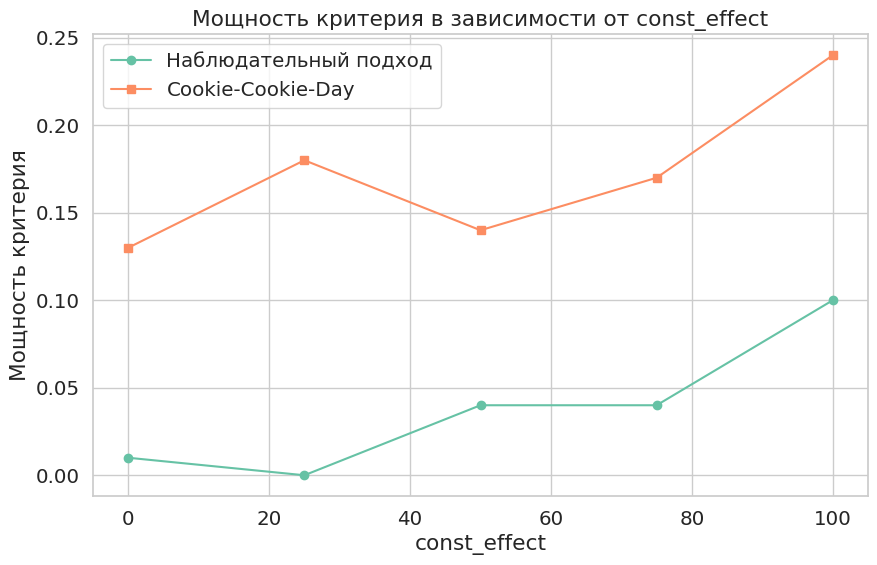

In [128]:
n_iter = 100
n_users = 15000
alpha = 0.05

scenario = {'scale': 1, 'gamma': 0.1, 'mode': 'novelty', 'const_effect': 0}

theta_effects = np.linspace(0, 100, 5) 

powers_obs = []
powers_ccd = []

for theta_effect in theta_effects:
    scenario['theta'] = theta_effect
    
    reject_obs = 0
    reject_ccd = 0
    
    for _ in tqdm(range(n_iter), leave=False):
        data_obs = generate_raw_data(n_users,
                                    period=period,
                                    avg_usage_distr=sps.expon(scale=2000),
                                    shows_up_distr=sps.bernoulli(0.5),
                                    daily_variation_distr=sps.norm(loc=1, scale=0.1))
        
        data_ccd = generate_raw_data(n_users,
                                     period=period,
                                     avg_usage_distr=sps.expon(scale=2000),
                                     shows_up_distr=sps.bernoulli(0.5),
                                     daily_variation_distr=sps.norm(loc=1, scale=0.1))
        
        prepare_data_obs_exp(data_obs, **scenario)
        prepare_data_ccd_exp(data_ccd, **scenario)
        
        p_obs = test_observational(data_obs, period-1)
        if p_obs < alpha:
            reject_obs += 1
        
        p_ccd = test_ccd(data_ccd, period-1)
        if p_ccd < alpha:
            reject_ccd += 1
    
    prob_obs, _, _ = estimate_reject_prob(reject_obs, n_iter)
    prob_ccd, _, _ = estimate_reject_prob(reject_ccd, n_iter)
    
    powers_obs.append(prob_obs)
    powers_ccd.append(prob_ccd)

plt.figure(figsize=(10, 6))
plt.plot(theta_effects, powers_obs, label='Наблюдательный подход', marker='o')
plt.plot(theta_effects, powers_ccd, label='Cookie-Cookie-Day', marker='s')
plt.xlabel('const_effect')
plt.ylabel('Мощность критерия')
plt.title('Мощность критерия в зависимости от const_effect')
plt.legend()
plt.grid(True)
plt.show()

*Вот и закончилась первая практическая задача. Правда же все просто если разобраться в имеющихся функциях? :)*

Получили что и хотели. Критерии корректные; ccd лучше по мощности словил непостоянный эффект 

ССD в целом в простой реализации вариантов изменения данных показывал большую мощность (по табличке)-> это согласуется с графиком 

---
### Задача 3.

*Так так, дай угадаю, ты уже посмотрел(а), что в задаче 6 пунктов? Не спеши расстраиваться и пропускать задачу! Одна довольно простая и увлекательная, в ней подробно расписано, что надо сделать. Вроде даже долгих вычислений и сложных функций тут нет. Так что, го!*

Наконец, давай сравним наш обычный t-test c критерием Вальда в последовательном анализе. На занятии мы уже начали их сравнивать. Возьми используемые там параметры, и убедись, что ты используешь одни и те же гипотезы и одинаковые значения вероятностей ошибок 1 и 2 рода. Формально, в случае t-test надо рассмотреть только простую альтернативу $\mathsf{H}_1\colon a=a_1$ и рассматривать мощность для нее, что мы и сделали на занятии.

**1.** Предположим, что $\mathsf{H}_0$ верна. Оцени время до принятия решения в последовательном анализе с помощью семплирования и по теоретической формуле.

*Не забудь, что возможные ответы в последовательном анализе несколько отличаются от стандартного подхода, причем имеется симметрия. Если ты это понимаешь, то сможешь легко решить данный пункт на основе предыдущих.*

Функции

In [24]:
def calculate_stat(sample, logpdf_0, logpdf_1, cumulative=False):
    """
    Вычисление статистики критерия.

    sample - выборка
    logpdf_0 - функция вычисления логарифма плотности при H_0
    logpdf_1 - функция вычисления логарифма плотности при H_1
    cumulative - вернуть ли кумулятивную статистику или же только итоговую
    """
    
    z_stats = logpdf_1(sample) - logpdf_0(sample)
    if cumulative:
        return np.cumsum(z_stats, axis=-1)
    else:
        return np.sum(z_stats, axis=-1)

def sequential_wald(samples, logpdf_0, logpdf_1, A, B, return_z=False):
    """
    Реализация последовательного критерия Вальда для исторических данных.

    sample - выборка
    logpdf_0 - функция вычисления логарифма плотности при H_0
    logpdf_1 - функция вычисления логарифма плотности при H_1
    A, B -- пороги
    return_z -- возвращать ли Z-статистики
    """

    z_stats = calculate_stat(samples, logpdf_0, logpdf_1, cumulative=True)

    # Текущий знак решения
    signs = (
        (z_stats >= np.log(B)).astype(int)
        - (z_stats <= np.log(A)).astype(int)
    )

    # Ищем первое ненулевое решение
    stop_time, decision = first_nonzero(signs)
    # Если такого нет, то мы не дошли до остановки, поставим максимальное время
    stop_time[decision == 0] = samples.shape[1]

    if return_z:
        return stop_time + 1, decision, z_stats
    else:
        return stop_time + 1, decision


def first_nonzero(values, axis=1):
    """
    Возвращает первый ненулевой элемент.
    Если таких нет, то возвращает 0.

    values -- двумерная матрица значений.
    axis -- ось, по которой производятся операции.
    """

    # Маска ненулевых элементов
    mask = values != 0
    # Индекс первого ненулевого элемента, если он есть.
    # Если его нет, то все нули, и возвращаем любой индекс, например, 0.
    first_nonzero_ind = np.where(mask.any(axis=axis), mask.argmax(axis=axis), 0)
    # Берем соответствующие элементы
    first_nonzero_values = values[range(values.shape[0]), first_nonzero_ind]

    return first_nonzero_ind, first_nonzero_values

def kl_norm(mean0, mean1, var0, var1):
    return 0.5 * (
        var0 / var1 + (mean1 - mean0) ** 2 / var1 - 1 + np.log(var1 / var0)
    )


def w(x, y):
    return x * np.log(x / (1 - y)) + (1 - x) * np.log((1 - x) / y)

def get_sample_size(alpha, beta, mde, var_x, var_y):
    """Расчитывает размер выборки для детектирование MDE

    :param alpha: желаемая ошибка первого рода
    :param beta: желаемая мощность
    :param mde: необходимый эффект
    :param var_x, var_y: дисперсии выборок
    :returns: необходимый размер выборки
    """

    q_sum = sps.norm.ppf(1 - alpha) + sps.norm.ppf(beta)
    return np.ceil((q_sum**2) * (var_x + var_y) / (mde * mde)).astype(int)

Константы

In [62]:
alpha = 0.05
beta = 0.2
scale = 1.0
mu0 = 0
mu1 = 0.25

A = beta / (1 - alpha)
B = (1 - beta) / alpha

sample_count = 50000  # Количество выборок
sample_size = 70  # Общий размер выборок

sequential_wald_normal = lambda samples: sequential_wald(
    samples,
    sps.norm(loc=mu0, scale=scale).logpdf,
    sps.norm(loc=mu1, scale=scale).logpdf,
    A,
    B,
    return_z=True,
)

Время до принятия решений на практике

In [63]:
samples_h0 = np.random.normal(mu0, scale, (sample_count, sample_size))
samples_h1 = np.random.normal(mu1, scale, (sample_count, sample_size))


stop_times_h0, decision_h0, z_h0 = sequential_wald_normal(samples_h0)
stop_times_h1, decision_h1, z_h1 = sequential_wald_normal(samples_h1)

print(f"E_0[tau]: {np.mean(stop_times_h0):.1f}")
print(f"E_1[tau]: {np.mean(stop_times_h1):.1f}")

E_0[tau]: 39.1
E_1[tau]: 51.3


Теоретические значения

In [64]:
theor_time_h0 = w(alpha, beta) / kl_norm(mu0, mu1, scale**2, scale**2)
theor_time_h1 = w(beta, alpha) / kl_norm(mu1, mu0, scale**2, scale**2)

print(f"E_0[tau] (theory): {theor_time_h0:.1f}")
print(f"E_1[tau] (theory): {theor_time_h1:.1f}")

E_0[tau] (theory): 42.9
E_1[tau] (theory): 61.0


Теория подтверждается практикой - предсказанные и реальные значения близки. Кроме того, я еще для H1 посчитал, и тут тоже все ок

**2.** Давай разберемся, можно ли совмещать два подхода &mdash; обычную процедуру проверки гипотез с критерием t-test и процедуру последовательного анализа с критерием Вальда. Для этого построим следующий критерий. Зафиксируем число $n$. До тех пор, пока размер выборки меньше $n$, будем пользоваться последовательным анализом и останавливать нашу процедуру в случае принятия одной из гипотез. Когда в выборке станет ровно $n$ объектов, а процедура последовательного анализа еще не завершилась, остановим ее и применим обычный t-test. Цель &mdash; оценить вероятность ошибки 1 рода у такой комбинации процедур.

*Указание.* Удобнее сразу сгенерировать выборки размера $n$, применить оба критерия независимо, а затем для наглядности построить <a href="https://miptstats.github.io/courses/python/10_pandas2.html#4.1-Функция-pd.crosstab">crosstab</a> по ответам каждого критерия, из нее уже можно получить ответ на вопрос задачи.

In [83]:
mask_ttest = (stop_times_h0 == sample_size + 1)

_, p_values = sps.ttest_1samp(samples_h0[mask_ttest], popmean=mu0, axis=1)
decisions_ttest = (p_values < alpha).astype(int)

full_ttest_decisions = np.full(sample_count, -1)
full_ttest_decisions[mask_ttest] = decisions_ttest

df = pd.DataFrame({
    'Wald_decision': (decision_h0 == 1).astype(int),
    'Ttest_decision': full_ttest_decisions
})
cross_tab = pd.crosstab(
    df['Wald_decision'], 
    df['Ttest_decision'], 
    rownames=['Wald'], 
    colnames=['T-test'],
    margins=True
)

full_ttest_decisions[~mask_ttest] = (decision_h0 == 1).astype(int)[~mask_ttest]

print(f"Общая вероятность ошибки I рода: {combined_decisions.mean():.4f}")
print("\nКросс-таблица решений:")
cross_tab

Общая вероятность ошибки I рода: 0.0365

Кросс-таблица решений:


T-test,-1,0,1,All
Wald,,,,
0,38149,10027,492,48668
1,1332,0,0,1332
All,39481,10027,492,50000


T-test повышает ошибку первого рода, но в этой реализация ошибка Вальда меньше 5%, и общая ошибка все равно меньше 5%

Повтори эту процедуру для нескольких $n$ и визуализируй зависимость. 
Не забудь сделать вывод.

In [122]:
n_values = np.arange(5, 550, 40)
sample_count = 10000
results = []

for n in n_values:
    samples_h0 = np.random.normal(mu0, sigma, (sample_count, n))
    
    stop_times_h0, decision_h0, _ = sequential_wald_normal(samples_h0)
    decision_h0 = (decision_h0 == 1).astype(int)
    
    mask_ttest = (stop_times_h0 == n)
    
    _, p_values = sps.ttest_1samp(samples_h0[mask_ttest], popmean=mu0, axis=1)
    decisions_ttest = (p_values < alpha).astype(int)
    
    combined_decisions = np.zeros(sample_count, dtype=int)
    combined_decisions[~mask_ttest] = decision_h0[~mask_ttest]
    combined_decisions[mask_ttest] = decisions_ttest
    
    error_rate = combined_decisions.mean()
    results.append((n, error_rate))

Изобразим

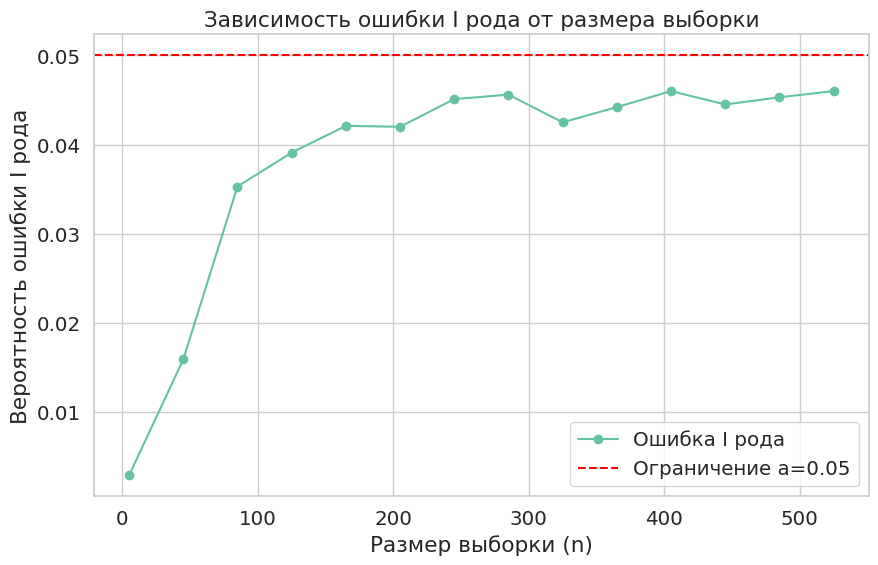

In [123]:
results = np.array(results)
plt.figure(figsize=(10, 6))
plt.plot(results[:, 0], results[:, -1], 'o-', label='Ошибка I рода')
plt.axhline(y=alpha, color='r', linestyle='--', label='Ограничение a=0.05')
plt.xlabel('Размер выборки (n)')
plt.ylabel('Вероятность ошибки I рода')
plt.title('Зависимость ошибки I рода от размера выборки')
plt.legend()
plt.grid(True)
plt.show()

Посмотрим внимательно на сводную таблицу отвержений при большой выборке

In [126]:
mask_ttest = (stop_times_h0 == sample_size + 1)

_, p_values = sps.ttest_1samp(samples_h0[mask_ttest], popmean=mu0, axis=1)
decisions_ttest = (p_values < alpha).astype(int)

full_ttest_decisions = np.full(sample_count, -1)
full_ttest_decisions[mask_ttest] = decisions_ttest

df = pd.DataFrame({
    'Wald_decision': (decision_h0 == 1).astype(int),
    'Ttest_decision': full_ttest_decisions
})
cross_tab = pd.crosstab(
    df['Wald_decision'], 
    df['Ttest_decision'], 
    rownames=['Wald'], 
    colnames=['T-test'],
    margins=True
)

full_ttest_decisions[~mask_ttest] = (decision_h0 == 1).astype(int)[~mask_ttest]

print(f"Общая вероятность ошибки I рода: {combined_decisions.mean():.4f}")
print("\nКросс-таблица решений:")
cross_tab

Общая вероятность ошибки I рода: 0.0460

Кросс-таблица решений:


T-test,-1,0,1,All
Wald,,,,
0,9488,49,3,9540
1,458,1,1,460
All,9946,50,4,10000


Те t-test почти не принимает решений об отвергании H0, почти вся нагрузка на отвержения только на Вальда -> поэтому мы все равно остаемся на практике в рамках 5%. 

**3.** Теперь поймем, какая процедура мощнее. На занятии мы установили "стандартные" параметры. Возьми размер выборки $n$, который дает мощность 80% по формуле MDE для стандартного t-test. Промоделируй выборки при справедливости $\mathsf{H}_1$ и посчитай долю случаев, в которых процедура последовательного анализа принимает $\mathsf{H}_1$ до момента времени $n$ включительно. Сделай вывод относительно мощности исследуемых процедур.

*Не забывай указания предыдущих пунктов и про код с занятия.*

Размер выборки (тест одновыборочный)

In [175]:
z_alpha = sps.norm.ppf(1 - alpha/2)
z_beta = sps.norm.ppf(0.8)
sample_size = ((z_alpha + z_beta)**2 * scale ** 2) / ((mu1-mu0)**2)
sample_size = int(np.ceil(sample_size))
sample_size

126

Далее оценим мощности 

In [176]:
sample_count = 10000
samples_h1 = np.random.normal(mu1, scale, (sample_count, sample_size))
decision_h1_wald = (sequential_wald_normal(samples_h1)[1] == 1).astype(int)
_, p_values = sps.ttest_1samp(samples_h1, popmean=mu0, axis=1)
decision_h1_ttest = (p_values < alpha).astype(int)

print(f"Вальд: {np.mean(decision_h1_wald):.2f}")
print(f"Т-тест: {np.mean(decision_h1_ttest):.2f}")

Вальд: 0.73
Т-тест: 0.79


В целом ожидаемо - Вальд может принимать решение не по всей выборке, а только по ее подмножеству, поэтому мощность чуть ниже

In [177]:
np.mean(sequential_wald_normal(samples_h1)[0] == sample_size + 1)

0.1072

То есть в 90% случаев Вальд остановился по пути, а в 10% случаев решение не было принято

**4.** На практике наблюдения могут приходить батчами по несколько объектов сразу. В таком случае нельзя устанавливать на них какой-либо порядок, применяя последовательный критерий Вальда по одному, необходимо добавлять сразу весь батч.

Исследуй, как меняется мощность процедуры последовательного анализа в зависимость от количества объектов в батче.

*Ты же понимаешь, что надо взять код из предыдущего пункта и указать один параметр?*

In [188]:
def batch_calculate_stat(samples, batch_size, logpdf_0, logpdf_1, cumulative=False):
    reshaped = samples.reshape(samples.shape[0], -1, batch_size)
   
    batch_stats = logpdf_1(reshaped) - logpdf_0(reshaped)
    batch_stats = np.sum(batch_stats, axis=2)
            
    if cumulative:
        return np.cumsum(batch_stats, axis=1)
    return batch_stats

def batch_sequential_wald(samples, batch_size, logpdf_0, logpdf_1, A, B):
    z_stats = batch_calculate_stat(samples, batch_size, logpdf_0, logpdf_1, cumulative=True)
            
    signs = (
        (z_stats >= np.log(B)).astype(int) - 
        (z_stats <= np.log(A)).astype(int)
    )
            
    stop_time, decision = first_nonzero(signs)
    stop_time[decision == 0] = z_stats.shape[1]
    return (stop_time + 1) * batch_size, decision

def simulate_batch_power(batch_sizes, n_simulations=10000,
                         alpha=0.05, beta=0.2, delta=0.25,
                         max_samples=50):
    """Исследует зависимость мощности от размера батча."""
    mu0, mu1 = 0, delta
    scale = 1.0
    
    def logpdf_0(x):
        return sps.norm.logpdf(x, loc=mu0, scale=scale)
    
    def logpdf_1(x):
        return sps.norm.logpdf(x, loc=mu1, scale=scale)
    
    A = beta / (1 - alpha)
    B = (1 - beta) / alpha
    
    results = []
    
    for batch_size in batch_sizes:
        n_batches = max_samples // batch_size
        samples = np.random.normal(mu1, scale, (n_simulations, n_batches * batch_size))
        
        stop_times, decisions = batch_sequential_wald(samples, batch_size,
                                                      logpdf_0, logpdf_1, A, B)
        power = np.mean(decisions == 1)
        
        results.append({
            'batch_size': batch_size,
            'power': power,
        })
    
    return pd.DataFrame(results)

Итак

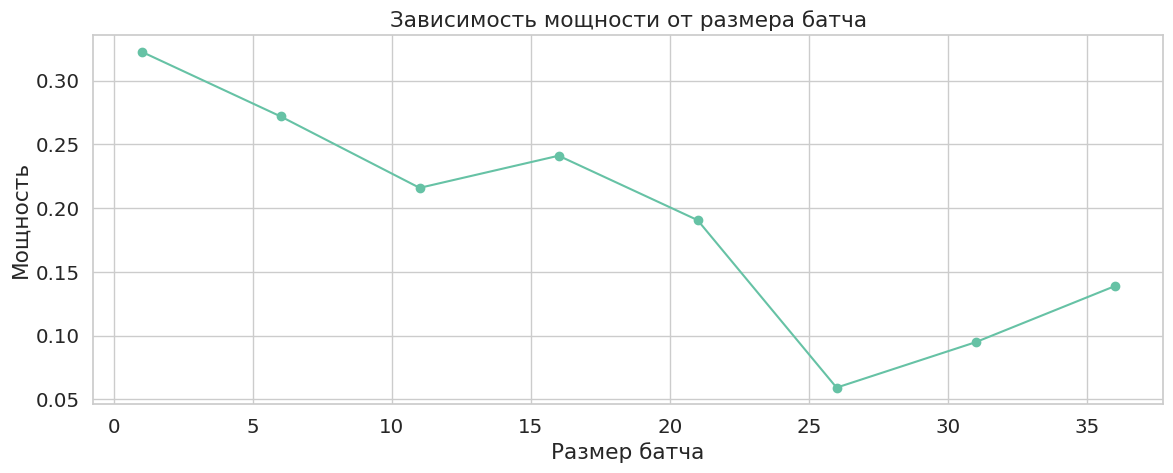

In [190]:
batch_sizes = np.arange(1, 40, 5)
results = simulate_batch_power(batch_sizes)

plt.figure(figsize=(12, 5))
plt.plot(results['batch_size'], results['power'], 'o-')
plt.xlabel('Размер батча')
plt.ylabel('Мощность')
plt.title('Зависимость мощности от размера батча')
plt.grid(True)
plt.tight_layout()
plt.show()

Мощность уменьшается. Логично -> опять, у Вальда меньше данных для анализа. Исходный ряд мог пересечь полосу между соседними поступлениями батчей

**5.** Наконец, давай вспомним, что последовательно приходящие данные не всегда являются выборкой, часто это временной ряд. Провалидируй процедуру последовательного анализа применительно к временным рядам.

*На занятии был код генерации временных рядов, используй его. И, конечно, код предыдущих пунктов задачи*.

In [205]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import statsmodels.stats.proportion as smp
import matplotlib.pyplot as plt
import seaborn as sns

def sequential_wald_one_sample(sample, logpdf_0, logpdf_1, A, B):
    """
    Реализация последовательного критерия Вальда для одной выборки.

    sample - одномерный массив наблюдений
    logpdf_0 - функция вычисления логарифма плотности при H_0
    logpdf_1 - функция вычисления логарифма плотности при H_1
    A, B -- пороги остановки (A < 1 < B)
    """
    
    log_likelihood_ratio = np.cumsum(logpdf_1(sample) - logpdf_0(sample))
    
    for i, stat in enumerate(log_likelihood_ratio):
        if stat >= np.log(B):
            return i + 1, 1  # Принятие H1
        elif stat <= np.log(A):
            return i + 1, 0  # Принятие H0
    
    return len(sample), -1  # Недостаточно данных для решения

def validate_wald(test_runs=1000, sample_size=50, time_size=10,
                  effect=0.05, A=0.05, B=20):
    """
    Валидация критерия Вальда: считаем количество принятий H0 и H1.
    
    test_runs - количество экспериментов
    sample_size - количество магазинов
    time_size - количество недель
    effect - добавляемый эффект при H1
    A, B - пороги Вальда
    """
    h0_results = []
    h1_results = []
    
    for _ in tqdm(range(test_runs), leave=False):
        test_data, control_data = generate_2_time_series(sample_size, time_size)
        
        shape, loc, scale = sps.gamma.fit(control_data['value'])
        control_logpdf = lambda x: sps.gamma.logpdf(x, shape, loc, scale)
        
        h0_decision = sequential_wald_one_sample(test_data['value'],
                                                 control_logpdf,
                                                 control_logpdf,
                                                 A, B)[1]
        h0_results.append(h0_decision)
        
        test_data = add_effect(test_data, effect, target_name='value')
        shape_t, loc_t, scale_t = sps.gamma.fit(test_data['value'])
        test_logpdf = lambda x: sps.gamma.logpdf(x, shape_t, loc_t, scale_t)
        
        h1_decision = sequential_wald_one_sample(test_data['value'],
                                                 control_logpdf,
                                                 test_logpdf,
                                                 A, B)[1]
        h1_results.append(h1_decision)
    
    
    return h0_results, h1_results

def estimate_reject_prob(n_rejects, n_iter):
    """
    Оценка вероятности отвержения критерия и ее доверительного интервала.
    """
    prob_reject = n_rejects / n_iter
    left_bound, right_bound = smp.proportion_confint(n_rejects,
                                                     n_iter,
                                                     method="wilson")
    return prob_reject, left_bound, right_bound

def visualization(prob_reject, left_bound, right_bound,
                  alpha=0.05, figsize=(10, 5), title=None):
    """
    Отрисовка интервала для вероятности отвержения критерия.
    """
    with sns.axes_style("whitegrid"):
        plt.figure(figsize=figsize)
        plt.hlines(0, 0, 1, color="black", lw=2, alpha=0.6)
        plt.vlines(alpha, -1, 1, color="red", lw=5, linestyle="--", alpha=0.6)
        plt.fill_between([left_bound, right_bound], [0.15] * 2, [-0.15] * 2, color="green", alpha=0.6)
        plt.scatter(prob_reject, 0, s=300, marker="*", color="red")
        plt.xlim((min(alpha, left_bound) - 1e-3, max(alpha, right_bound) + 1e-3))
        plt.title(f"Доля отвержений = {100*prob_reject:.2f}%, "
                  f"интервал ({100*left_bound:.2f}%, {100*right_bound:.2f}%)")
        plt.suptitle(title)
        plt.ylim((-0.5, 0.5))
        plt.yticks([])
        plt.tight_layout()
        plt.show()

Запуск

  0%|          | 0/100 [00:00<?, ?it/s]

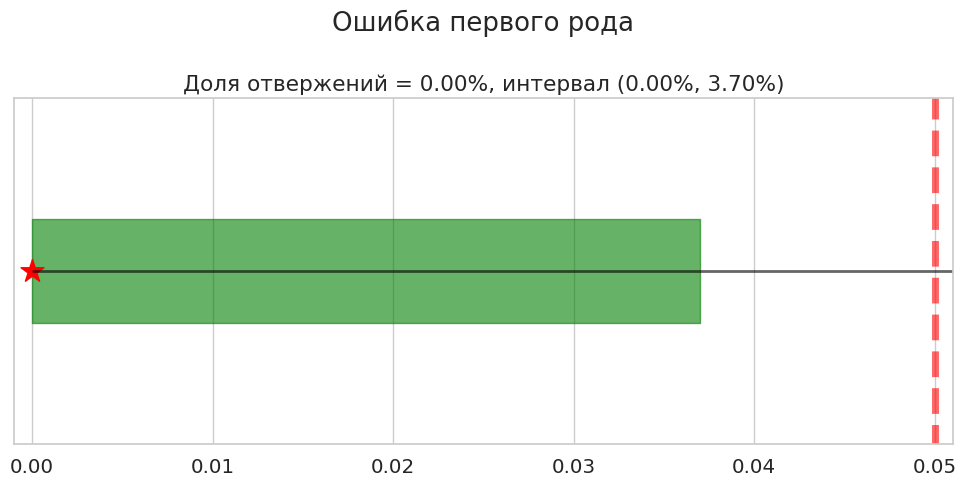

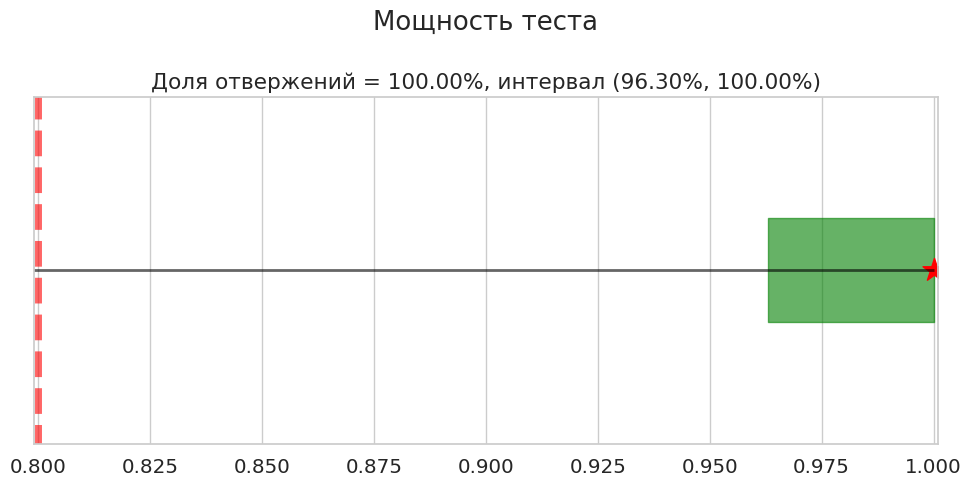

In [206]:
test_runs = 100
sample_size = 1
time_size = 10
effect = 0.01
A = 0.05
B = 20

h0_results, h1_results = validate_wald(test_runs, sample_size, time_size, effect, A, B)

alpha_hat, alpha_left, alpha_right = estimate_reject_prob(h0_results.count(1),
                                                          test_runs)
beta_hat, beta_left, beta_right = estimate_reject_prob(h1_results.count(0),
                                                       test_runs)

visualization(alpha_hat, alpha_left, alpha_right,
              alpha=0.05, title="Ошибка первого рода")

visualization(1 - beta_hat, 1 - beta_right,
              1 - beta_left, alpha=0.8, title="Мощность теста")


**6.** Не забудь сделать выводы.

По предыдущему пункту:

Все ок! Провалидировал на АА + оценил мощность на АБ - все хорошо

Вальд хорош, когда мы хотим подглядывать и в случае чего раньше останавливать эксп - например, мы можем меньше терять на ухудшающих тестах (или просто словить поломку метрик), однако ему нужно подбирать пороги, подбирать распределения, он сложнее в реализации, может дать худшую мощность

Вот и все, еще одно задание закончилось, вроде же хорошо мы вместе решили задачки, правда?)

А теперь, как и раньше, все перепроверь, поработай над качеством оформления и отправляй боту. Не забудь покушать, и спокойной ночи!

Пойду спать (уже 15:00) :(